In [17]:
from gerrychain import Graph, Partition
import matplotlib.pyplot as plt
from pcompress import Replay
from graph_utils import *
from tqdm import tqdm
from info import info
import pandas as pd
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
state = "VA"
graph = Graph.from_json(f"jsons/{state}_vtd20.json")

In [4]:
updaters = add_updaters(state, graph)

In [13]:
VA_A3 = make_partition("VA", graph, 40, "A3")

In [16]:
ces40 = []
splits40 = []
swings40 = []
for part in tqdm(Replay(graph, f"chains/VA/40/VA-40-neutral-True-50000-sep17.chain", updaters=updaters), total=50000):
    ces40.append(len(part.cut_edges))
    splits40.append(part.county_splits)
    swings40.append(part.swing_districts)

 86%|████████████████████████████████████████████████▊        | 42856/50000 [07:34<01:15, 94.33it/s]


In [21]:
def make_histogram(state, graph, dists, data, plans):
    partitions = [make_partition(state, graph, dists, plans) for plan in plans]
    
    min_val = min(data)
    max_val = max(data)
    _, ax = plt.subplots(figsize=(12,8))
    
    ax.hist(data,
            bins=np.arange(min_val, max_val+2, 1),
           )
    plt.show()
    plt.close()
    return

In [37]:
plans = ["A3", "B3"]
colors = ["darkgreen", "orange"]

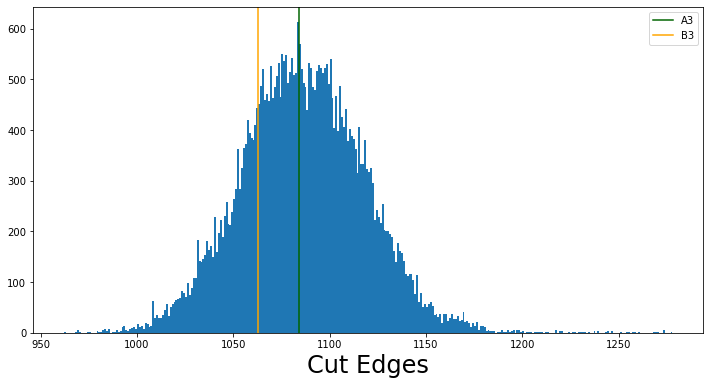

In [41]:
min_val = min(ces40)
max_val = max(ces40)
_, ax = plt.subplots(figsize=(12,6))

ax.hist(ces40,
        bins=np.arange(min_val, max_val+2, 1),
       )
for i, plan in enumerate(plans):
    partition = make_partition(state, graph, 40, plan)
    ax.axvline(len(partition.cut_edges),
               label=plan,
               color=colors[i],
              )
ax.legend()
ax.set_xlabel("Cut Edges", fontsize=24)
plt.show()
plt.close()

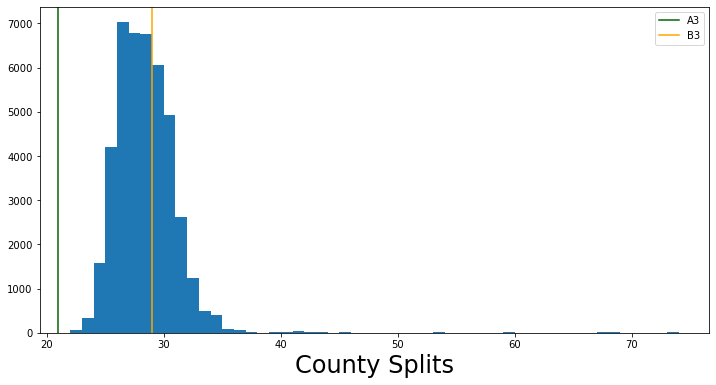

In [45]:
min_val = min(splits40)
max_val = max(splits40)
_, ax = plt.subplots(figsize=(12,6))

ax.hist(splits40,
        bins=np.arange(min_val, max_val+2, 1),
       )
for i, plan in enumerate(plans):
    partition = make_partition(state, graph, 40, plan)
    ax.axvline(partition.county_splits,
               label=plan,
               color=colors[i],
              )
ax.legend()
ax.set_xlabel("County Splits", fontsize=24)
plt.show()
plt.close()

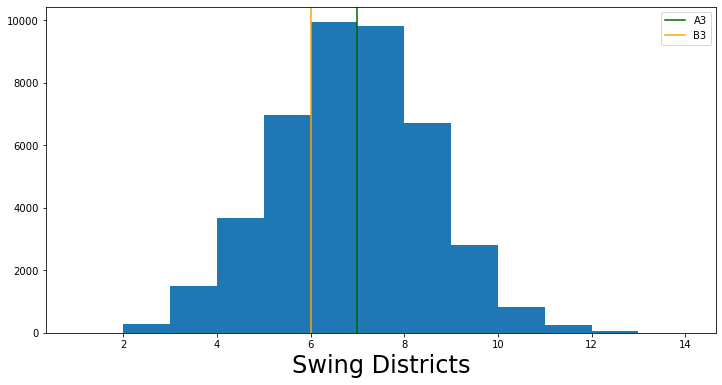

In [46]:
min_val = min(swings40)
max_val = max(swings40)
_, ax = plt.subplots(figsize=(12,6))

ax.hist(swings40,
        bins=np.arange(min_val, max_val+2, 1),
       )
for i, plan in enumerate(plans):
    partition = make_partition(state, graph, 40, plan)
    ax.axvline(partition.swing_districts,
               label=plan,
               color=colors[i],
              )
ax.legend()
ax.set_xlabel("Swing Districts", fontsize=24)
plt.show()
plt.close()